<a href="https://colab.research.google.com/github/DavidAlzateOcampo/DataScienceNetwork/blob/master/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest with Scikit Learn

The current notebook has a purpose to give a brief explanation for random forest solution and how to use it with scikit learn library

## Loading libraries

In [0]:
# Load the libraries needed 
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
# Set random seed
np.random.seed(0)

After loading the libraries used in this notebook. It will be assigned the data sets to local variables. 

## Data Wrangling & Exploration


In [0]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
print('The shape of iris dataset is :', df.shape)


The shape of iris dataset is : (150, 4)


In [0]:
df.columns
df.columns = ['sepal_length_cm', 'sepal_width_cm'
             ,'petal_length_cm','petal_width_cm'
             ,'species']

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'species'],
      dtype='object')

Rename columns to have an easier access to data

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null category
dtypes: category(1), float64(4)
memory usage: 5.0 KB


In [0]:
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Divide Data by Category

In [0]:
setosa      = df[df['species']=='setosa']
versicolor  = df[df['species']=='versicolor']
virginica   = df[df['species']=='virginica']
print("Division of categories is : ", df.groupby('species').size())

Division of categories is :  species
setosa        50
versicolor    50
virginica     50
dtype: int64


In [0]:
setosa.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [0]:
versicolor.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [0]:
virginica.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


species
setosa        50
versicolor    50
virginica     50
dtype: int64

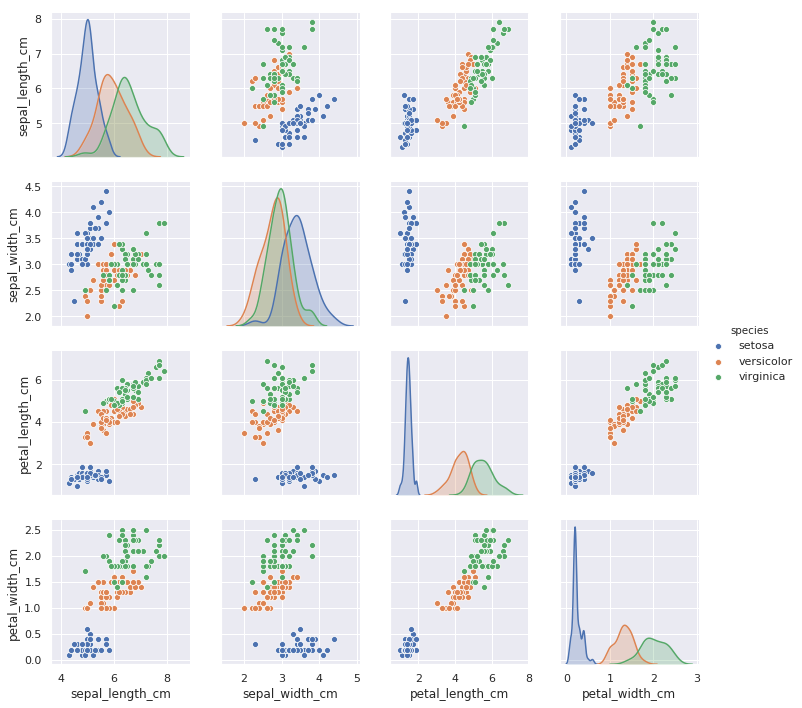

In [0]:
sns.set()
sns.pairplot(df[['sepal_length_cm','sepal_width_cm'
                ,'petal_length_cm', 'petal_width_cm', 'species']]
                ,hue="species", diag_kind="kde")